In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa


# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")


# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)


# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),

    ]
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# TODO: definiraj karakteristike procesa ucenja pomocu .compile()
print(y_train_s.shape)
print(x_train_s.shape)
model.fit(x_train_s, y_train_s, epochs=5, batch_size=32)


# TODO: provedi ucenje mreze
print(y_train_s.shape)
print(x_train_s.shape)

model.fit(x_train_s, y_train_s, epochs=5, batch_size=32)

# TODO: Prikazi test accuracy i matricu zabune
model.summary()
loss_and_metrics = model.evaluate(x_test_s, y_test_s, batch_size=128)
print("Model accuracy: ", loss_and_metrics)

Y_predict = model.predict(x_test_s)
Y_predict = np.argmax(Y_predict, 1)
Y_test = np.argmax(y_test_s, 1)
mtx = confusion_matrix(Y_test, Y_predict)
print(mtx)

# TODO: spremi model
model.save('model')



11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 10)
(60000, 28, 28, 1)
Epoch 1/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2036 - accuracy: 0.9392
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0775 - accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0606 - accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0509 - accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0442 - accuracy: 0.9862
(60000, 10)
(60000, 28, 28, 1)
Epoch 1/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0428 - accuracy: 0.9864
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0393 - accuracy: 0.9876
Epoch 

In [21]:
from keras_preprocessing.image import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage import color
import cv2 as cv
import matplotlib.image as mpimg
import numpy as np

<ipython-input-22-3ecc1e9aaa92>:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = color.rgb2gray(img)


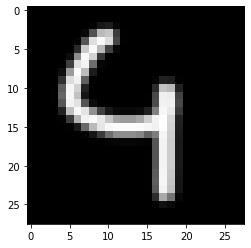

1/1 [==============================] - 0s 64ms/step
------------------------
Prediction is number:  4


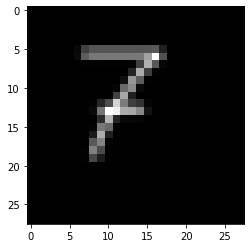

1/1 [==============================] - 0s 72ms/step
------------------------
Prediction is number:  7


In [22]:
filename = 'test.png'

img = mpimg.imread(filename)
img = color.rgb2gray(img)
img = resize(img, (28, 28))


plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')


# TODO: ucitaj model
model = load_model(filepath="model")

# TODO: napravi predikciju 
prediction = model.predict(img)
classes = np.argmax(prediction, axis=1)


# TODO: ispis rezultat
print("------------------------")
print("Prediction is number: ", classes[0])

filename = 'test2.png'

img = cv.imread(filename=filename)
img = color.rgb2gray((img))
img = resize(img, (28, 28))

plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')

model = load_model(filepath="model")

prediction = model.predict(img)
classes = np.argmax(prediction, axis=1)

print("------------------------")
print("Prediction is number: ", classes[0])
